## **2D Convection**

The 2D convection equations are represented by a pair of coupled PDEs:

$$
\begin{aligned}
    \frac{\partial{u}}{\partial{t}} + u\frac{\partial{u}}{\partial{x}} + v\frac{\partial{u}}{\partial{y}} = 0\\
    \frac{\partial{v}}{\partial{t}} + u\frac{\partial{v}}{\partial{x}} + v\frac{\partial{v}}{\partial{y}} = 0\\
\end{aligned}
$$


These are discretised as follows:

$$
\begin{aligned}
    \frac{u_{i, j}^{n + 1} - u_{i, j}^{n}}{\Delta{t}} + u_{i,j}^{n}\frac{u_{i, j}^{n} - u_{i - 1, j}^{n}}{\Delta{x}} + v_{i,j}^{n}\frac{u_{i, j}^{n} - u_{i, j - 1}^{n}}{\Delta{y}} = 0\\
    \frac{v_{i, j}^{n + 1} - v_{i, j}^{n}}{\Delta{t}} + u_{i,j}^{n}\frac{v_{i, j}^{n} - v_{i - 1, j}^{n}}{\Delta{x}} + v_{i,j}^{n}\frac{v_{i, j}^{n} - v_{i, j - 1}^{n}}{\Delta{y}} = 0\\
\end{aligned}
$$


Rearranging both equations:

$$
\begin{aligned}
    u_{i,j}^{n + 1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta{t}}{\Delta{x}}(u_{i,j}^{n} - u_{i - 1,j}^{n}) - v_{i,j}^{n}\frac{\Delta{t}}{\Delta{y}}(u_{i,j}^{n} - u_{i, j - 1}^{n})\\
    v_{i,j}^{n + 1} = v_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta{t}}{\Delta{x}}(v_{i,j}^{n} - v_{i - 1,j}^{n}) - v_{i,j}^{n}\frac{\Delta{t}}{\Delta{y}}(v_{i,j}^{n} - v_{i, j - 1}^{n})\\
\end{aligned}
$$

Note that these equations are also coupled.

#### **Initial Conditions:**
$$
u,v = \begin{equation}
\left\{ 
  \begin{aligned}
    2 \quad&\text{for } x, y \in (0.5, 1) \times (0.5, 1)\\
    1 \quad&\text{everywhere else}\\
  \end{aligned}
  \right.
\end{equation}
$$

#### **Boundary Conditions:**

$$
u = 1,v = 1 \text{ for } \begin{equation}
\left\{ 
  \begin{aligned}
    x = 0, 2\\
    y = 0, 2\\
  \end{aligned}
  \right.
\end{equation}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

In [3]:
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2
v[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

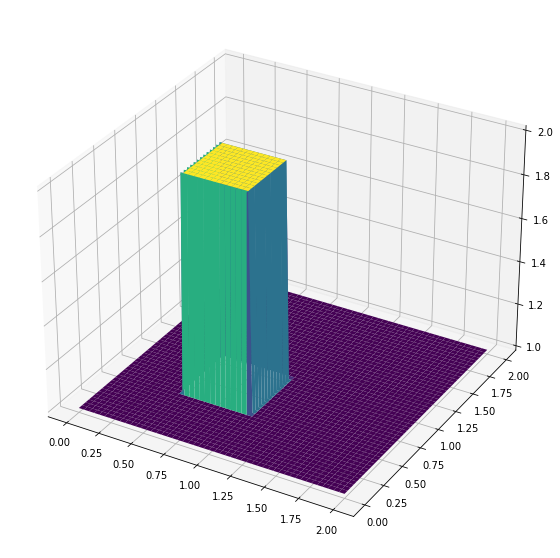

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis', rstride=2, cstride=2)

In [5]:
for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()
    
    u[1:, 1:] = (un[1:, 1:] - (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) - vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] - (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) - vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    # boundary conditions
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

Text(0.5, 0.92, 'v')

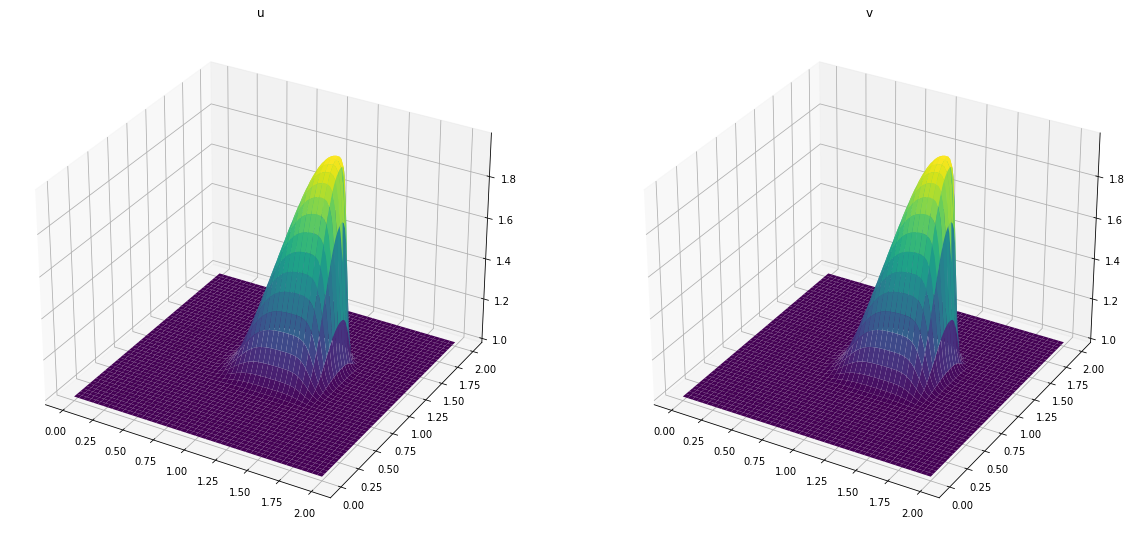

In [6]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis', rstride=2, cstride=2)
ax.set_title('u')

ax = fig.add_subplot(122, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap='viridis', rstride=2, cstride=2)
ax.set_title('v')